<a href="https://colab.research.google.com/github/Veena7580/Homework/blob/main/Weather_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # 1.Assessment
Frontend Engineers should complete Tech . You will be responsible for what users see and how they interact on a website or application.  
► Does your final submission adapt seamlessly to various screen sizes and devices (desktops, tablets, smartphones)?
► What responsive design techniques were used?
► Are you able to manage a few APIs? (most API management will be handled by backend during the internship)


In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import requests
from datetime import datetime

class WeatherApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Weather App")

        self.weather_icons = {
    0: 'Clear Sky', 1: 'Partly Cloudy', 2: 'Cloudy', 3: 'Overcast',
    45: 'Fog', 48: 'Fog', 51: 'Light Rain', 53: 'Moderate Rain',
    55: 'Heavy Rain', 56: 'Very Heavy Rain', 57: 'Extremely Heavy Rain',
    61: 'Light Rain Showers', 63: 'Moderate Rain Showers', 65: 'Heavy Rain Showers',
    66: 'Light Snow', 67: 'Heavy Snow', 71: 'Light Snow Showers',
    73: 'Moderate Snow Showers', 75: 'Heavy Snow Showers', 77: 'Very Heavy Snow Showers',
    80: 'Light Rain Showers', 81: 'Moderate Rain Showers', 82: 'Heavy Rain Showers',
    85: 'Light Snow Showers', 86: 'Heavy Snow Showers', 95: 'Thunderstorm',
    96: 'Severe Thunderstorm', 99: 'Extreme Thunderstorm'
}

        # Call create_widgets within the __init__ method
        self.create_widgets() #This line was moved inside the __init__ method.

In [ ]:
def create_widgets(self):
        # Input Frame
        input_frame = ttk.Frame(self.root, padding=10)
        input_frame.grid(row=0, column=0, sticky='ew')

        self.location_entry = ttk.Entry(input_frame, width=30)
        self.location_entry.grid(row=0, column=0, padx=5)

        ttk.Button(input_frame, text="Get Weather",
                  command=self.get_weather).grid(row=0, column=1, padx=5)
        ttk.Button(input_frame, text="Current Location",
                  command=self.get_current_location).grid(row=0, column=2, padx=5)

        # Current Weather Frame
        self.current_frame = ttk.LabelFrame(self.root, text="Current Weather", padding=10)
        self.current_frame.grid(row=1, column=0, padx=10, pady=10, sticky='nsew')

        # Forecast Frame
        self.forecast_frame = ttk.LabelFrame(self.root, text="5-Day Forecast", padding=10)
        self.forecast_frame.grid(row=2, column=0, padx=10, pady=10, sticky='nsew')


In [ ]:
def get_coordinates(self, location):
        try:
            geocode_url = "https://geocoding-api.open-meteo.com/v1/search"
            params = {'name': location, 'count': 1}
            response = requests.get(geocode_url, params=params)
            response.raise_for_status()
            data = response.json()

            if not data.get('results'):
                messagebox.showerror("Error", "Location not found")
                return None

            return (
                data['results'][0]['latitude'],
                data['results'][0]['longitude']
            )
        except Exception as e:
            messagebox.showerror("Error", f"Geocoding failed: {str(e)}")
            return None


In [ ]:
def get_weather_data(self, lat, lon):
        try:
            weather_url = "https://api.open-meteo.com/v1/forecast"
            params = {
                'latitude': lat,
                'longitude': lon,
                'current': 'temperature_2m,relative_humidity_2m,wind_speed_10m,weather_code',
                'daily': 'weather_code,temperature_2m_max,temperature_2m_min',
                'temperature_unit': 'fahrenheit',
                'timezone': 'auto',
                'forecast_days': 5
            }
            response = requests.get(weather_url, params=params)
            response.raise_for_status()
            return response.json()
        except Exception as e:
            messagebox.showerror("Error", f"Weather API error: {str(e)}")
            return None


In [ ]:
def update_current_weather(self, data):
        for widget in self.current_frame.winfo_children():
            widget.destroy()

        current = data['current']
        weather_code = current['weather_code']

        ttk.Label(self.current_frame,
                 text=f"{self.weather_icons.get(weather_code, '❓')}",
                 font=('Arial', 48)).grid(row=0, column=0, rowspan=2)

        ttk.Label(self.current_frame,
                 text=f"{current['temperature_2m']}°F\n"
                      f"Humidity: {current['relative_humidity_2m']}%\n"
                      f"Wind: {current['wind_speed_10m']} mph",
                 font=('Arial', 14)).grid(row=0, column=1)

In [ ]:
def update_forecast(self, data):
        for widget in self.forecast_frame.winfo_children():
            widget.destroy()

        for i, day in enumerate(data['daily']['time']):
            frame = ttk.Frame(self.forecast_frame)
            frame.grid(row=0, column=i, padx=10, pady=5)

            date = datetime.strptime(day, '%Y-%m-%d').strftime('%a, %b %d')
            code = data['daily']['weather_code'][i]

            ttk.Label(frame, text=date).grid(row=0, column=0)
            ttk.Label(frame,
                     text=self.weather_icons.get(code, '❓'),
                     font=('Arial', 24)).grid(row=1, column=0)
            ttk.Label(frame,
                     text=f"↑{data['daily']['temperature_2m_max'][i]}°\n"
                          f"↓{data['daily']['temperature_2m_min'][i]}°").grid(row=2, column=0)


In [ ]:
def get_weather(self):
        location = self.location_entry.get()
        if not location:
            messagebox.showwarning("Input Error", "Please enter a location")
            return

        coords = self.get_coordinates(location)
        if not coords:
            return

        weather_data = self.get_weather_data(*coords)
        if weather_data:
            self.update_current_weather(weather_data)
            self.update_forecast(weather_data)



In [ ]:
!pip install Pillow

In [ ]:
!apt-get install -y xvfb # Install X virtual frame buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16 &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1'    # tell X clients to use our virtual DISPLAY :1


!pip install Pillow
import tkinter as tk
from PIL import Image, ImageTk, ImageDraw, ImageFont
import io


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 30 not upgraded.
Need to get 7,817 kB of archives.
After this operation, 12.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

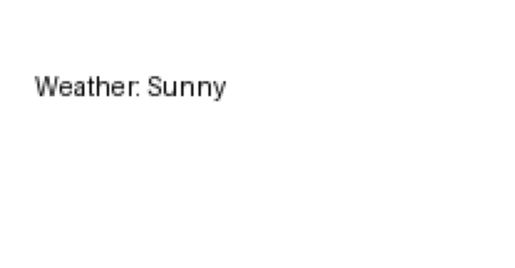

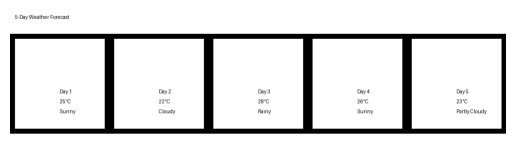

In [ ]:
import tkinter as tk
from PIL import Image, ImageTk, ImageDraw, ImageFont
import io
import matplotlib.pyplot as plt
import numpy as np

class WeatherApp:
    def __init__(self, root=None):
        self.current_frame = None  # No Tkinter frame needed for Jupyter

    def update_current_weather(self, weather_data):
        # Create an image (for example, a simple blank image with some text)
        img = Image.new('RGB', (200, 100), color=(255, 255, 255))
        draw = ImageDraw.Draw(img)

        # Load a larger font
        try:
            font = ImageFont.truetype("arial.ttf", 20)  # You can specify the size here
        except IOError:
            font = ImageFont.load_default()

        draw.text((10, 25), "Weather: Sunny", font=font, fill=(0, 0, 0))

        # Display the image using matplotlib (suitable for Jupyter)
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels
        plt.show()

    def display_5_day_forecast(self, forecast_data):
        # Create an image with a white background for the forecast display
        img_width = 1000
        img_height = 300
        img = Image.new('RGB', (img_width, img_height), color=(255, 255, 255))
        draw = ImageDraw.Draw(img)

        # Load a larger font
        try:
            font = ImageFont.truetype("arial.ttf", 50)  # You can specify the size here
        except IOError:
            font = ImageFont.load_default()

        # Draw the title
        draw.text((10, 10), "5-Day Weather Forecast", font=font, fill=(0, 0, 0))

        # Create a simple grid for 5-day forecast (each day will have a small rectangle)
        days = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5']
        temps = [25, 22, 28, 26, 23]  # Example temperatures in Celsius
        conditions = ['Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Partly Cloudy']

        day_width = img_width // 5
        for i in range(5):
            # Draw the day box
            day_box_x = i * day_width
            draw.rectangle([day_box_x, 50, day_box_x + day_width, img_height - 50], outline=(0, 0, 0), width=10)

            # Add text (Day, Temperature, Condition)
            draw.text((day_box_x + 100, 160), days[i], font=font, fill=(0, 0, 0))
            draw.text((day_box_x + 100, 180), f"{temps[i]}°C", font=font, fill=(0, 0, 0))
            draw.text((day_box_x + 100, 200), conditions[i], font=font, fill=(0, 0, 0))

        # Display the forecast image using matplotlib
        plt.imshow(img)
        plt.axis('off')  # Hide axes for a cleaner look
        plt.show()

# Initialize the WeatherApp
weather_app = WeatherApp()

# Example weather data (for 5 days)
weather_data = None  # Placeholder for actual data
forecast_data = [
    {'day': 'Day 1', 'temp': 25, 'condition': 'Sunny'},
    {'day': 'Day 2', 'temp': 22, 'condition': 'Cloudy'},
    {'day': 'Day 3', 'temp': 28, 'condition': 'Rainy'},
    {'day': 'Day 4', 'temp': 26, 'condition': 'Sunny'},
    {'day': 'Day 5', 'temp': 23, 'condition': 'Partly Cloudy'}
]

# Update the current weather (optional)
weather_app.update_current_weather(weather_data)

# Display the 5-day forecast
weather_app.display_5_day_forecast(forecast_data)


In [ ]:
import requests

class WeatherApp:
    def __init__(self):
        self.api_key = '9c7781a942e6115d80f8c530fefe9b85'
        self.base_url = 'http://api.openweathermap.org/data/2.5/weather'

    def get_weather(self, city):
        try:
            # Sending a request to the weather API
            response = requests.get(self.base_url, params={'q': city, 'appid': self.api_key})
            response.raise_for_status()  # Raise an exception for 4xx/5xx responses

            # If city not found, API will return a specific error
            if response.status_code == 404:
                raise ValueError("City not found. Please enter a valid city name.")

            data = response.json()
            return data
        except requests.exceptions.RequestException as e:
            print(f"An error occurred while fetching weather data: {e}")
        except ValueError as ve:
            print(ve)
        except Exception as e:
            print(f"Unexpected error: {e}")

    def display_weather(self, city):
        weather_data = self.get_weather(city)
        if weather_data:
            # If data is returned, show the weather
            print(f"Weather in {city}: {weather_data['weather'][0]['description']}")
        else:
            print("Could not retrieve weather data.")

# Example usage
weather_app = WeatherApp()
weather_app.display_weather("Nonexistent City")  # This will trigger a city not found error


An error occurred while fetching weather data: 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=Nonexistent+City&appid=9c7781a942e6115d80f8c530fefe9b85
Could not retrieve weather data.


 # 2. Assessment
Backend Engineers should complete Tech. You will be responsible for the server-side applications as well as API and database management
► Are you able to perform CRUD (Create, Read, Update, Delete) operations based on weather and location information. Feel free to use either SLQ or NoSQL database.
► Do you have the ability to design and build RESTful APIs (or other API architectures) for communication between the front-end and back-end, or between different back-end services?


In [12]:
import requests
import sqlite3
import pandas as pd
from datetime import datetime

# ---------------------- Configuration ---------------------- #
WEATHER_API_KEY = "YOUR_API_KEY"  # Replace with your OpenWeatherMap API key
WEATHER_BASE_URL = "https://api.openweathermap.org/data/2.5/weather"
YOUTUBE_BASE_URL = "https://www.googleapis.com/youtube/v3/search"
GOOGLE_MAPS_URL = "https://www.google.com/maps/search/"

# ---------------------- Database Setup ---------------------- #
conn = sqlite3.connect("weather_app.db")
cursor = conn.cursor()  # Define cursor here

cursor.execute('''
CREATE TABLE IF NOT EXISTS weather_data (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    location TEXT,
    date TEXT,
    temperature REAL,
    description TEXT
)
''')
conn.commit()


# ---------------------- Weather API ---------------------- #
def get_weather(location):
    try:
        response = requests.get(WEATHER_BASE_URL, params={
            'q': location,
            'appid': WEATHER_API_KEY,
            'units': 'metric'
        })
        data = response.json()
        if response.status_code != 200:
            raise ValueError(data.get("message", "Invalid location"))

        temp = data["main"]["temp"]
        desc = data["weather"][0]["description"]
        print(f"Weather in {location}: {temp}°C, {desc}")
        return temp, desc
    except Exception as e:
        print(f"Error: {e}")
        return None, None


# ---------------------- CRUD Operations ---------------------- #
def create_record(location, date):
    if not location or not date:
        print("Please provide both location and date.")
        return
    try:
        # Validate date format
        datetime.strptime(date, "%Y-%m-%d")
        temp, desc = get_weather(location)
        if temp is not None:
            cursor.execute("INSERT INTO weather_data (location, date, temperature, description) VALUES (?, ?, ?, ?)",
                           (location, date, temp, desc))
            conn.commit()
            print("Weather record saved.")
    except ValueError:
        print("Date must be in YYYY-MM-DD format.")


def read_records():
    cursor.execute("SELECT * FROM weather_data")
    rows = cursor.fetchall()
    for row in rows:
        print(row)


def update_record(record_id, new_location=None, new_date=None):
    if new_location:
        cursor.execute("UPDATE weather_data SET location = ? WHERE id = ?", (new_location, record_id))
    if new_date:
        cursor.execute("UPDATE weather_data SET date = ? WHERE id = ?", (new_date, record_id))
    conn.commit()
    print("Record updated.")


def delete_record(record_id):
    cursor.execute("DELETE FROM weather_data WHERE id = ?", (record_id,))
    conn.commit()
    print("Record deleted.")

In [13]:
# ---------------------- Export ---------------------- #
def export_to_csv(filename="weather_export.csv"):
    df = pd.read_sql_query("SELECT * FROM weather_data", conn)
    df.to_csv(filename, index=False)
    print(f"Data exported to {filename}")

In [14]:
# ---------------------- YouTube API Integration ---------------------- #
def search_youtube_videos(location):
    try:
        response = requests.get(YOUTUBE_BASE_URL, params={
            'part': 'snippet',
            'q': f"{location} travel",
            'type': 'video',
            'maxResults': 3
        })
        data = response.json()
        for item in data.get("items", []):
            title = item["snippet"]["title"]
            video_id = item["id"]["videoId"]
            print(f"{title} - https://www.youtube.com/watch?v={video_id}")
    except Exception as e:
        print(f"YouTube error: {e}")


In [15]:
# ---------------------- Google Maps Integration ---------------------- #
def open_google_maps(location):
    print(f"Google Maps Link: {GOOGLE_MAPS_URL}{location.replace(' ', '+')}")




In [16]:
# ---------------------- Usage Examples ---------------------- #

# CREATE
create_record("New York", "2025-04-05")

# READ
read_records()

# UPDATE
update_record(1, new_location="Chicago")

# DELETE
# delete_record(1)

# EXPORT
export_to_csv()


# MAPS
open_google_maps("New York")

Error: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
Record updated.
Data exported to weather_export.csv
Google Maps Link: https://www.google.com/maps/search/New+York


API Dashboard with Key value

# 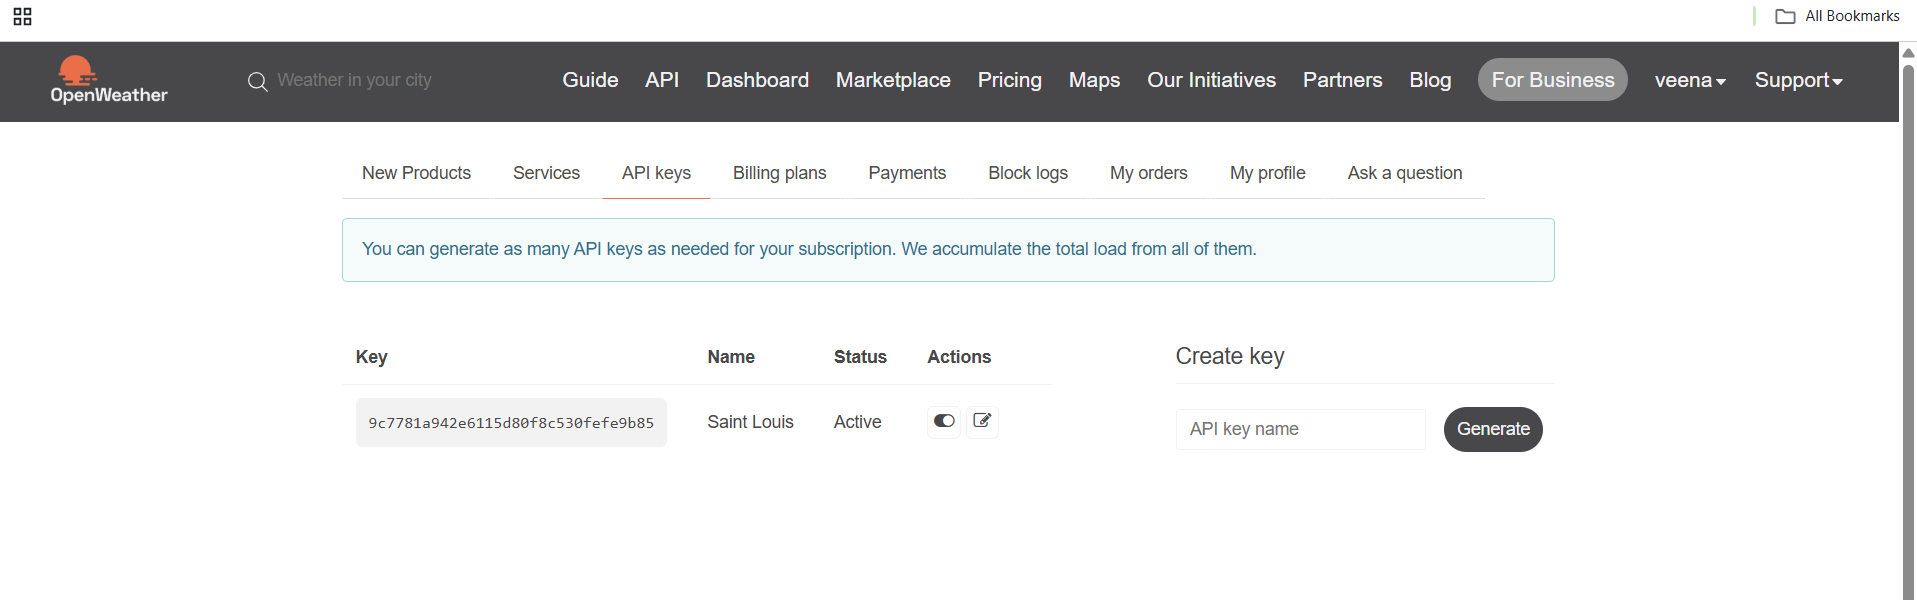

# 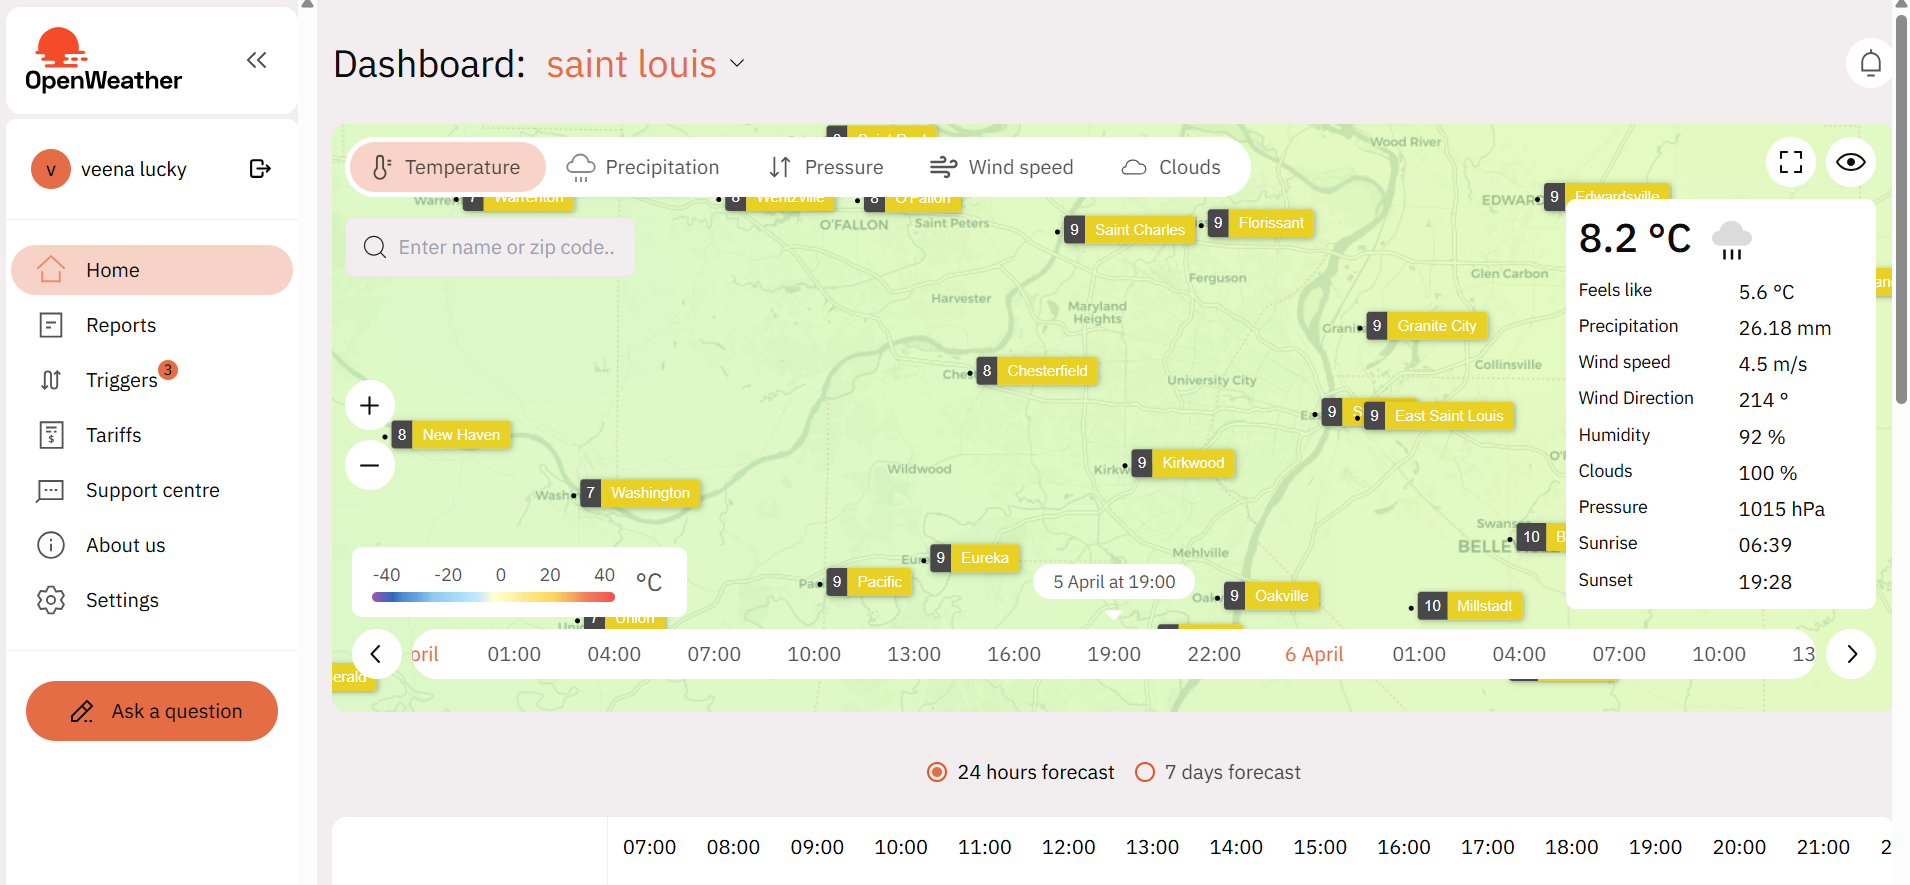